# Plant Growth Prediction and Classification

### Goal
The goal of this project is to analyze how well plants can meet their growth milestones based on variables such as light, soil type, water, fertilizer, temperature, and humidity. Four types of classification models (KNN, Decision Tree, Logistic Regression, and SVC) will be trained and fitted on the growth variable data to predict if a plant will successfully reach maturity. Furthermore, we can use permutation importance to analyze each feature and determine the optimal parameters to increase yield.

### Data Problem
We will train, optimize, and cross-validate four binary classification models to predict if the growth condition provided to the plant is sufficient for its maturity.

### Expected Result
The expectation of this study is a predictive model that can accurately determine if the plant will meet its growth milestone based on the environmental factors provided

### Data
This dataset comes from Kaggle: https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification/data

The following column descriptions are taken from the dataset provider:
- Soil_Type: The type or composition of soil in which the plants are grown.
- Sunlight_Hours: The duration or intensity of sunlight exposure received by the plants.
- Water_Frequency: How often the plants are watered, indicating the watering schedule.
- Fertilizer_Type: The type of fertilizer used for nourishing the plants.
- Temperature: The ambient temperature conditions under which the plants are grown.
- Humidity: The level of moisture or humidity in the environment surrounding the plants.
- Growth_Milestone: Descriptions or markers indicating stages or significant events in the growth process of the plants.

## Setup
#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, make_column_selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.inspection import permutation_importance

#### Import Data

In [2]:
data = pd.read_csv('plant_growth_data.csv')

## Data Understanding and Cleaning

Taking a quick look at our data:

In [3]:
data.head()

Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
0      loam        5.192294       bi-weekly        chemical    31.719602   
1     sandy        4.033133          weekly         organic    28.919484   
2      loam        8.892769       bi-weekly            none    23.179059   
3      loam        8.241144       bi-weekly            none    18.465886   
4     sandy        8.374043       bi-weekly         organic    18.128741   

    Humidity  Growth_Milestone  
0  61.591861                 0  
1  52.422276                 1  
2  44.660539                 0  
3  46.433227                 0  
4  63.625923                 0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [5]:
data.isna().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

We can make the following observations:
- The size of the data is (193, 7)
- It contains 3 categorical columns: `Soil_Type`, `Water_Frequency`, and `Fertilizer_Type`
- It contains 3 numerical columns: `Sunlight_Hours`, `Temperature`, and `Humidity`
- The target variable is `Growth_Milestone`
- No data is missing

## Exploratory Data Analysis

### Feature Analysis

First, analyze the proportions of each variable. We can see from the pie chart and histograms below that we have a very well balanced dataset

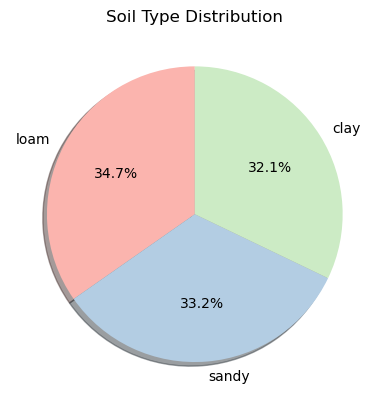

In [6]:
fig, ax = plt.subplots()

ax.pie(data['Soil_Type'].value_counts(), # sum up instances of unique values
       labels = data['Soil_Type'].unique(), # get names of values
       autopct='%1.1f%%',
       colors=plt.get_cmap('Pastel1').colors,
       shadow = True,
       startangle=90)

ax.set_title('Soil Type Distribution')

plt.show()

Text(0.5, 0, 'Sunlight')

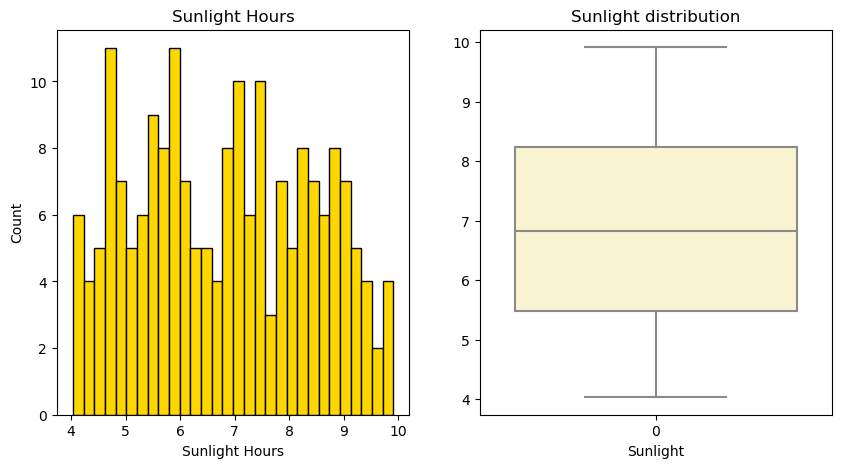

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(data['Sunlight_Hours'], # make histogram
         edgecolor='black',
         color = 'gold',
         bins = 30)

plt.title('Sunlight Hours')
plt.xlabel('Sunlight Hours')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(data['Sunlight_Hours'], color='lemonchiffon') # make boxplot
plt.title('Sunlight distribution')
plt.xlabel('Sunlight')


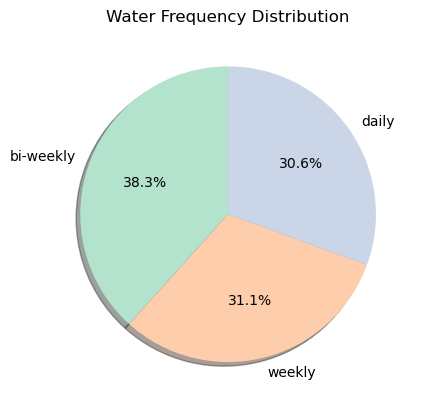

In [8]:
fig, ax = plt.subplots()

ax.pie(data['Water_Frequency'].value_counts(), # sum up instances of unique values
       labels = data['Water_Frequency'].unique(), # get names of values
       autopct='%1.1f%%',
       colors=plt.get_cmap('Pastel2').colors,
       shadow = True,
       startangle=90)

ax.set_title('Water Frequency Distribution')

plt.show()

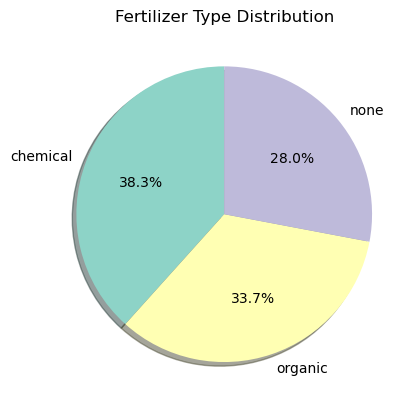

In [9]:
fig, ax = plt.subplots()

ax.pie(data['Fertilizer_Type'].value_counts(), # sum up instances of unique values
       labels = data['Fertilizer_Type'].unique(), # get names of values
       autopct='%1.1f%%',
       colors=plt.get_cmap('Set3').colors,
       shadow = True,
       startangle=90)

ax.set_title('Fertilizer Type Distribution')

plt.show()

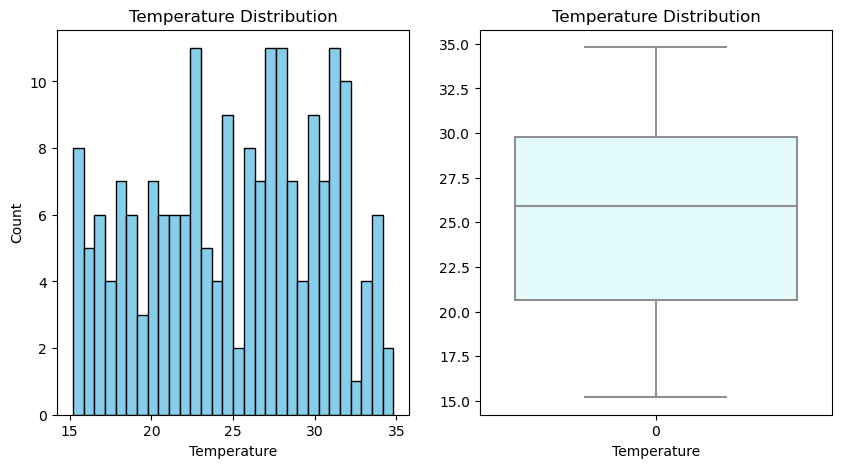

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(data['Temperature'], # make histogram
         edgecolor='black',
         color = 'skyblue',
         bins = 30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(data['Temperature'], color='lightcyan') # make boxplot
plt.title('Temperature Distribution')
plt.xlabel('Temperature')

plt.show()

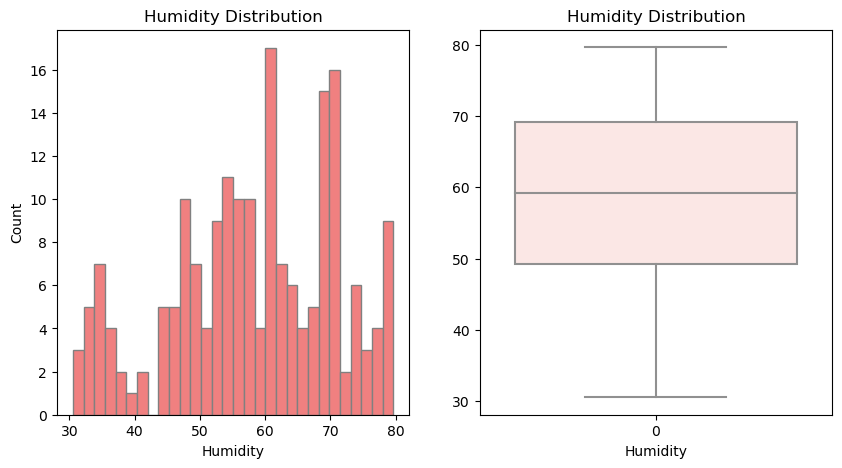

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(data['Humidity'], # make histogram
         edgecolor='grey',
         color = 'lightcoral',
         bins = 30)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(data['Humidity'], color='mistyrose') # make boxplot
plt.title('Humidity Distribution')
plt.xlabel('Humidity')

plt.show()

### Summary of Data Distribution
- Categorical features are well balanced with each unique type accounting for roughly the same percentage of the whole
- Numerical features do not contain outliers and are randomly distributed. 
- Statistical mean lies approximately at the center of range.

### Target Variable Analysis
- The classes in our target variable are also well balanced

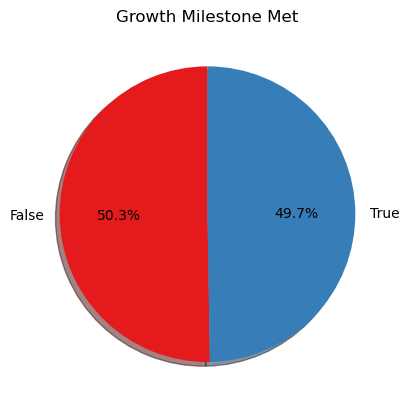

In [12]:
fig, ax = plt.subplots()
ax.pie(data['Growth_Milestone'].value_counts(), # make pie chart
       labels = [False, True],
       autopct='%1.1f%%',
       colors=plt.get_cmap('Set1').colors,
       shadow = True,
       startangle=90)

ax.set_title('Growth Milestone Met')
plt.show()

## Data Cleaning and Preprocessing

### Create features and target

In [13]:
X = data.drop('Growth_Milestone', axis=1) # drop target variable from dataset
y = data['Growth_Milestone'] # set target variable

### Split into train/test set

In [14]:
# split data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle = True)

### Create transformer
- Target encoder will be used on all categorical features which converts the feature into individual columns. 1 signifies that the feature is present, 0 signifies that the feature is not.
- The rest of the variables are numeric which will be transformed by StandardScaler()

In [15]:
# Transformer to be used in pipeline
te = make_column_transformer((TargetEncoder(target_type = 'binary'), 
                              make_column_selector(dtype_include=object)),
                              remainder = StandardScaler(),
                              verbose_feature_names_out = False)

## Modeling

### Baseline model
- We will use a simple Logistic Regression classifier with default parameters as our baseline model
- The goal is to improve upon this baseline classifier such that our performance metrics (accuracy, precision, recall) is maximized and computation time is minimized

In [16]:
# create baseline model pipeline
baseline_pipe = Pipeline([('te', te),
                          ('lr', LogisticRegression())])

In [17]:
# calculate time elapsed
tic = time.time()
baseline_pipe.fit(X_train, y_train)
toc = time.time() - tic

# calculate scores
train_acc = accuracy_score(y_train, baseline_pipe.predict(X_train))
test_acc = accuracy_score(y_test, baseline_pipe.predict(X_test))
train_prec = precision_score(y_train, baseline_pipe.predict(X_train))
test_prec = precision_score(y_test, baseline_pipe.predict(X_test))
train_rec = recall_score(y_train, baseline_pipe.predict(X_train))
test_rec = recall_score(y_test, baseline_pipe.predict(X_test))

# create score dictionary
scores_dict = {'Set': ['Train', 'Test'],
               'Accuracy': [train_acc, test_acc],
               'Precision': [train_prec, test_prec],
               'Recall': [train_rec, test_rec]}

# create DataFram from dictionary
pd.DataFrame.from_dict(scores_dict)

Set  Accuracy  Precision    Recall
0  Train  0.642857   0.646154  0.567568
1   Test  0.538462   0.611111  0.500000

Our baseline model only performs slightly better than random guess. Next we will tune the hyperparameters to achieve a better model

##### Create function for calculations

In [18]:
def score_df(pipe, X_train, y_train, info):
    # time elapsed
    tic = time.time()
    pipe.fit(X_train, y_train)
    toc = time.time() - tic
    
    # calculate scores
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc = accuracy_score(y_test, pipe.predict(X_test))
    train_prec = precision_score(y_train, pipe.predict(X_train))
    test_prec = precision_score(y_test, pipe.predict(X_test))
    train_rec = recall_score(y_train, pipe.predict(X_train))
    test_rec = recall_score(y_test, pipe.predict(X_test))
    
    scores_dict = {'Set': ['Train', 'Test'],
                   'Accuracy': [train_acc, test_acc],
                   'Precision': [train_prec, test_prec],
                   'Recall': [train_rec, test_rec]}
    
    if info == 'score':
        return pd.DataFrame.from_dict(scores_dict) # return scores when prompted
    if info == 'time':
        return toc #return time elapsed when prompted

### Logistic Regression

- To set up the logistic regression model we will tune two specific hyperparameters: C, and solver type.
- We then create a pipeline to transform the data and apply our model. max_iter is set to a large number so it does not time out during training

In [19]:
# Define parameters
lr_params = {'lr__C': [0.01, 0.1, 1, 10, 100],
             'lr__solver': ['liblinear', 'saga']}

In [20]:
lr_pipe = Pipeline([('te', te),
                    ('lr', LogisticRegression(max_iter = 100000))])

Using GridSearchCV to identify hyperparameters which gives us the best model

In [21]:
lr_grid = GridSearchCV(lr_pipe, lr_params)
lr_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('te',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(target_type='binary'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x128007c50>)],
                                                          verbose_feature_names_out=False)),
                                       ('lr',
                                        LogisticRegression(max_iter=100000))]),
             param_grid={'lr__C': [0.01, 0.1, 1, 10, 100],
                         'lr__solver': ['liblinear', 'saga']})

Calculate score and training time

In [22]:
lr_results = score_df(lr_grid.best_estimator_, X_train, y_train, 'score')
lr_time = score_df(lr_grid.best_estimator_, X_train, y_train, 'time')
print(lr_results, '\n', 'Fit time', lr_time)

     Set  Accuracy  Precision    Recall
0  Train  0.649351   0.647059  0.594595
1   Test  0.538462   0.590909  0.590909 
 Fit time 0.013261079788208008


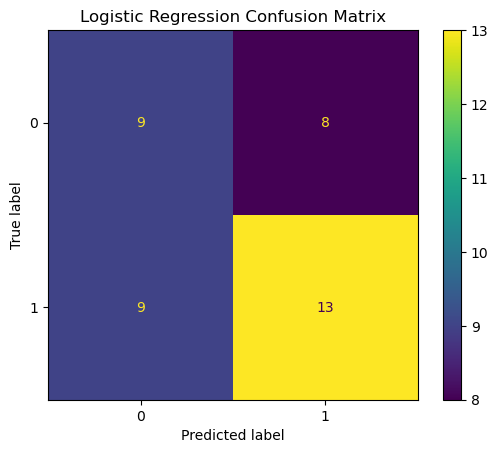

In [23]:
# create confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_grid.best_estimator_.predict(X_test))).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

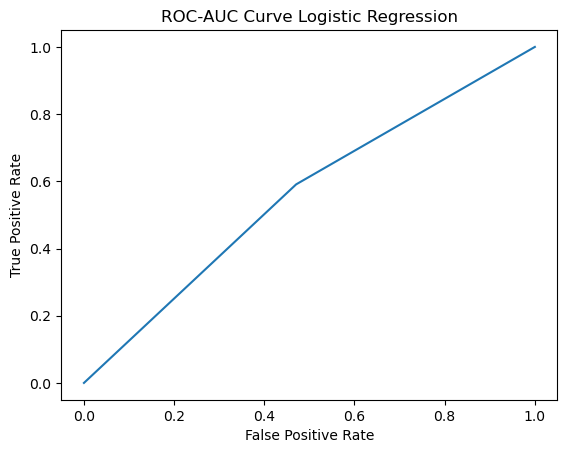

In [24]:
# create ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_grid.best_estimator_.predict(X_test))
plt.plot(fpr, tpr)
plt.title('ROC-AUC Curve Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Decision Tree Classifier

- For the Decision Tree Classifier we will tune three specific hyperparameters: max_depth, min_samples_split, and min_samples_leaf
- A similar pipeline is created to transform the data and apply the model
- GridSearchCV is used to find the best hyperparameters

In [25]:
dtree_params = {'dtree__max_depth': [None, 10, 20, 30, 40, 50],
                'dtree__min_samples_split': [2, 4, 6, 8, 10],
                'dtree__min_samples_leaf': [1, 3, 5, 7]}

In [26]:
dtree_pipe = Pipeline([('te', te),
                    ('dtree', DecisionTreeClassifier())])

In [27]:
dtree_grid = GridSearchCV(dtree_pipe, dtree_params)
dtree_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('te',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(target_type='binary'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x128007c50>)],
                                                          verbose_feature_names_out=False)),
                                       ('dtree', DecisionTreeClassifier())]),
             param_grid={'dtree__max_depth': [None, 10, 20, 30, 40, 50],
                         'dtree__min_samples_leaf': [1, 3, 5, 7],
                         'dtree__min_samples_split': [2, 4, 6, 8, 10]})

In [28]:
# calculate results
dtree_results = score_df(dtree_grid.best_estimator_, X_train, y_train, 'score')
dtree_time = score_df(dtree_grid.best_estimator_, X_train, y_train, 'time')
print(dtree_results, '\n', 'Fit time', dtree_time)

     Set  Accuracy  Precision    Recall
0  Train  0.870130   0.885714  0.837838
1   Test  0.615385   0.652174  0.681818 
 Fit time 0.011595010757446289


In [50]:
dtree_grid.best_estimator_

Pipeline(steps=[('te',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('targetencoder',
                                                  TargetEncoder(target_type='binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x12846a390>)],
                                   verbose_feature_names_out=False)),
                ('dtree',
                 DecisionTreeClassifier(max_depth=30, min_samples_split=10))])

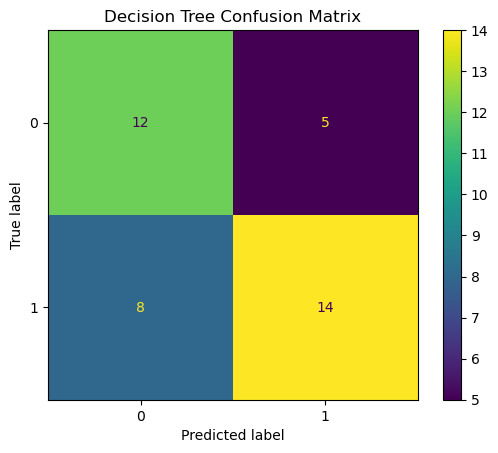

In [29]:
# create confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_grid.best_estimator_.predict(X_test))).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

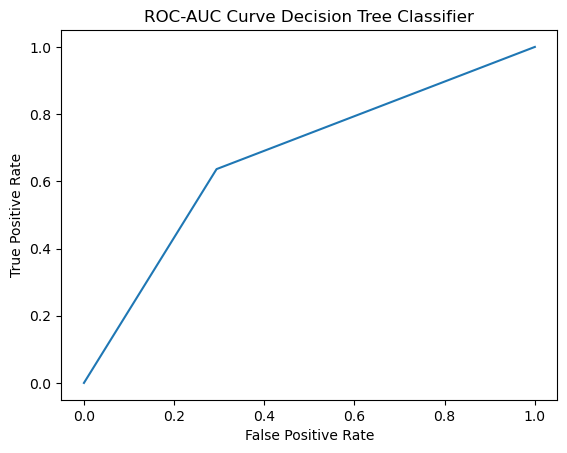

In [30]:
# create ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, dtree_grid.best_estimator_.predict(X_test))
plt.plot(fpr, tpr)
plt.title('ROC-AUC Curve Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### K-Neighbors Classifier

- For the K-Neighbors Classifier we will tune two specific hyperparameters: n_neighbors, and weights
- A similar pipeline is created to transform the data and apply the model
- GridSearchCV is used to find the best hyperparameters

In [31]:
knn_params = {'knn__n_neighbors': [2, 4, 6, 8, 10],
              'knn__weights': ['uniform', 'distance']}

In [32]:
knn_pipe = Pipeline([('te', te),
                    ('knn', KNeighborsClassifier())])

In [33]:
knn_grid = GridSearchCV(knn_pipe, knn_params)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('te',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(target_type='binary'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x128007c50>)],
                                                          verbose_feature_names_out=False)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 4, 6, 8, 10],
                         'knn__weights': ['uniform', 'distance']})

In [34]:
# calculate results
knn_results = score_df(knn_grid.best_estimator_, X_train, y_train, 'score')
knn_time = score_df(knn_grid.best_estimator_, X_train, y_train, 'time')
print(knn_results, '\n', 'Fit time', knn_time)

     Set  Accuracy  Precision    Recall
0  Train  0.681818   0.686567  0.621622
1   Test  0.358974   0.384615  0.227273 
 Fit time 0.03296780586242676


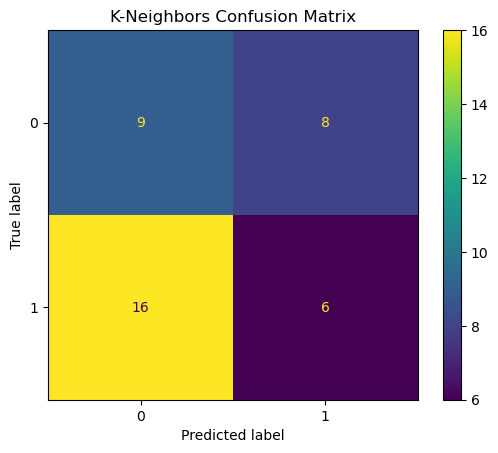

In [35]:
# create confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_grid.best_estimator_.predict(X_test))).plot()
plt.title("K-Neighbors Confusion Matrix")
plt.show()

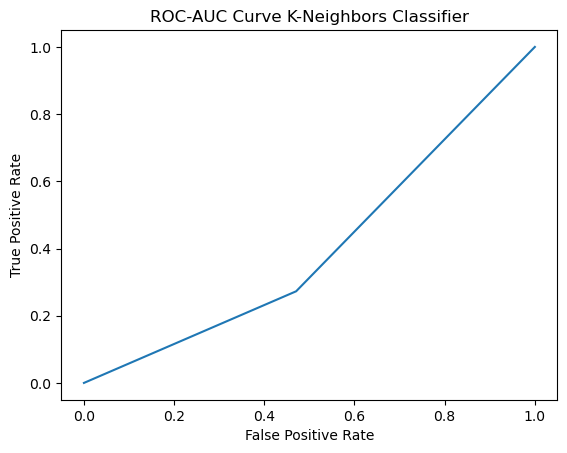

In [36]:
# create ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_grid.best_estimator_.predict(X_test))
plt.plot(fpr, tpr)
plt.title('ROC-AUC Curve K-Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### SVC

- For SVC we will tune two specific hyperparameters: C, and kernel
- A similar pipeline is created to transform the data and apply the model
- GridSearchCV is used to find the best hyperparameters

In [37]:
svc_params = {'svc__C': [0.01, 0.1, 1, 10, 100],
              'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [38]:
svc_pipe = Pipeline([('te', te),
                    ('svc', SVC())])

In [39]:
svc_grid = GridSearchCV(svc_pipe, svc_params)
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('te',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('targetencoder',
                                                                         TargetEncoder(target_type='binary'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x128007c50>)],
                                                          verbose_feature_names_out=False)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [40]:
# calculate results
svc_results = score_df(svc_grid.best_estimator_, X_train, y_train, 'score')
svc_time = score_df(svc_grid.best_estimator_, X_train, y_train, 'time')
print(svc_results, '\n', 'Fit time', svc_time)

     Set  Accuracy  Precision    Recall
0  Train  0.662338   0.661765  0.608108
1   Test  0.538462   0.590909  0.590909 
 Fit time 0.0868070125579834


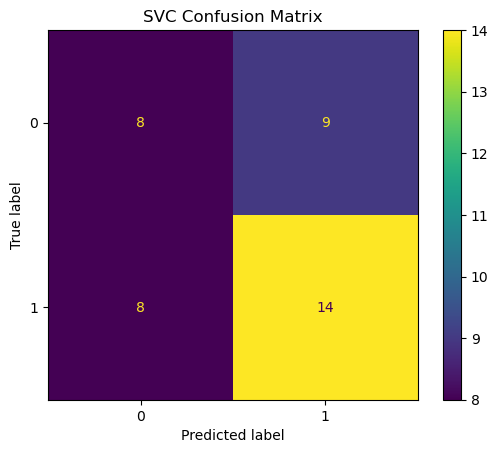

In [41]:
# create confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, svc_grid.best_estimator_.predict(X_test))).plot()
plt.title("SVC Confusion Matrix")
plt.show()

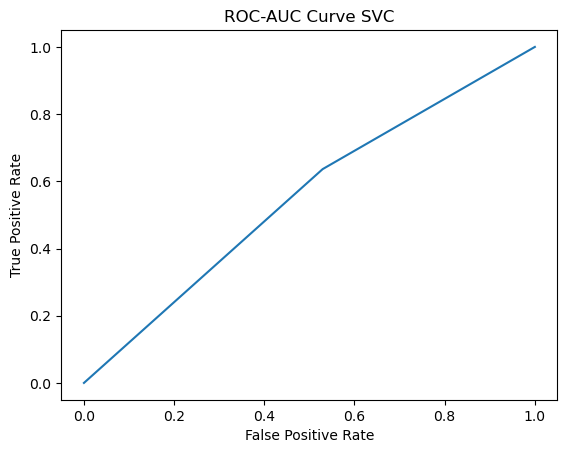

In [42]:
# create ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, svc_grid.best_estimator_.predict(X_test))
plt.plot(fpr, tpr)
plt.title('ROC-AUC Curve SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Key Observations
- Decision Tree Classifier scored the highest all across the board.
- The ROC-AUC curve for Decision Tree Classifier also has the largest area under the curve, supporting the analysis that Decision Tree performed the best out of the 4 models.
- Decision Tree Classifier had the smallest number of false positives. From an agricultural perspective, we want to minimize false positives since it could lead to a shortage of mature plants
- KNN performed the worst out of the 4 classifiers.

### Feature Importance

Our next goal is to determine which features are most important for prediction if the growth milestone can be reached, and whether or not we can eliminate any variables. We will use permutation importance.

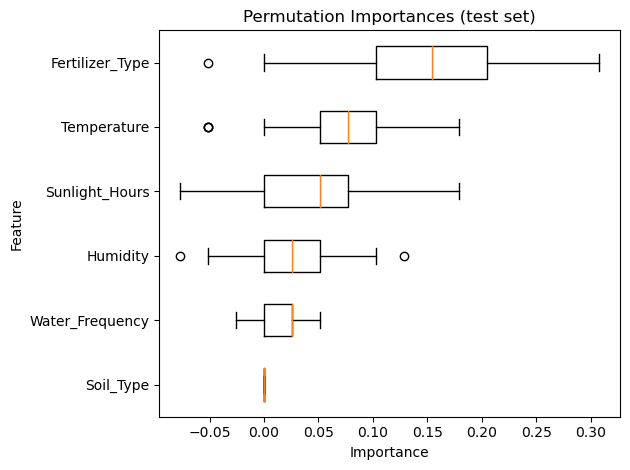

In [43]:
# Permutation Importance using best logistic regression model
perm_imp = permutation_importance(dtree_grid.best_estimator_, X_test, y_test, n_repeats = 100)
sorted_idx = perm_imp.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(perm_imp.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
ax.set_ylabel('Feature')
ax.set_xlabel('Importance')
fig.tight_layout()
plt.show()

Since the more positive the importance is, the more impact a variable has on the model, we can see that the most important feature by far is `Fertilizer_Type`, followed by `Temperature` and `Sunlight_Hours`

Below we will take a look at the distribution of plants that met/did not meet their growth milestone based on which type of fertilizer they recieved.

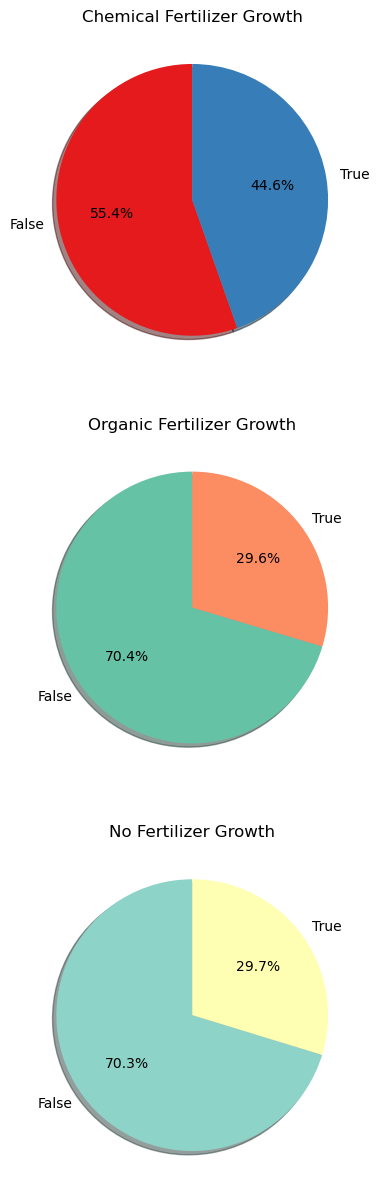

In [44]:
# separate data by fertilizer type
chem_fertilizer = data.query("Fertilizer_Type == 'chemical'")
org_fertilizer = data.query("Fertilizer_Type == 'organic'")
none_fertilizer = data.query("Fertilizer_Type == 'none'")

plt.figure(figsize=(15,15))

# create pie chart
plt.subplot(3,1,1)
plt.pie(chem_fertilizer['Growth_Milestone'].value_counts(),
       labels = [False, True],
       autopct='%1.1f%%',
       colors=plt.get_cmap('Set1').colors,
       shadow = True,
       startangle=90)
plt.title('Chemical Fertilizer Growth')

plt.subplot(3,1,2)
plt.pie(org_fertilizer['Growth_Milestone'].value_counts(),
       labels = [False, True],
       autopct='%1.1f%%',
       colors=plt.get_cmap('Set2').colors,
       shadow = True,
       startangle=90)
plt.title('Organic Fertilizer Growth')

plt.subplot(3,1,3)
plt.pie(none_fertilizer['Growth_Milestone'].value_counts(),
       labels = [False, True],
       autopct='%1.1f%%',
       colors=plt.get_cmap('Set3').colors,
       shadow = True,
       startangle=90)
plt.title('No Fertilizer Growth')
plt.show()

- From the above charts we can see that the percentage of plants that met their growth metric and was fed chemical ferilizer was about 1.5x that of organic fertilizer and no fertilizer
- This shows that chemical fertilizer significantly boosts plant growth

## Results

- Decision Tree Classifier scored the highest for all metrics (accuracy, precision, recall)
- After performing permutation importance on the features, we find that 'fertilizer type' is the most important variable that impacted whether or not a plant met its growth milestone
- The best classifier model was determined to be DecisionTreeClassifier with max_depth = 30 and min_samples_split = 10.
- The worst classifier was K Nearest Neighbors

##### Business Understanding
- Fertilizer type is crucial for determining if a plant meets its growth milestone, as a plant fed with chemical fertilizer was 1.5x more likely succeed compared to plants fed with organic fertilizer and no fertilizer
- From an agricultural business perspective, it is much better to have false negatives than false positives, since it is better to predict a shortage than a surplus.

## Next Steps

- More data would likely improve the classification models. A bigger dataset would minimize fluctuation in performance due to the train/test split.
- The Decision Tree model can be further tuned to detect for any overfitting
- The assumption is that all plants in this dataset are of the same specie, however the provider of this dataset did not confirm if this is true. If our assumption was false we would have to further divide up the dataset since different plants respond differently to environmental factors.